# **Project - Classification and Hypothesis Testing: Hotel Booking Cancellation Prediction**

## **Marks: 40**

---------------
## **Problem Statement**

### **Context**

**A significant number of hotel bookings are called off due to cancellations or no-shows.** Typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost. This may be beneficial to hotel guests, but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

This pattern of cancellations of bookings impacts a hotel on various fronts:
1. **Loss of resources (revenue)** when the hotel cannot resell the room.
2. **Additional costs of distribution channels** by increasing commissions or paying for publicity to help sell these rooms.
3. **Lowering prices last minute**, so the hotel can resell a room, resulting in reducing the profit margin.
4. **Human resources to make arrangements** for the guests.

### **Objective**

This increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal - they are facing problems with this high number of booking cancellations and have reached out to your firm for data-driven solutions. You, as a Data Scientist, have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


### **Data Description**

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below:


**Data Dictionary**

* **Booking_ID:** Unique identifier of each booking
* **no_of_adults:** Number of adults
* **no_of_children:** Number of children
* **no_of_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **no_of_week_nights:** Number of weekday nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **type_of_meal_plan:** Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* **required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)
* **room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* **lead_time:** Number of days between the date of booking and the arrival date
* **arrival_year:** Year of arrival date
* **arrival_month:** Month of arrival date
* **arrival_date:** Date of the month
* **market_segment_type:** Market segment designation.
* **repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)
* **no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking
* **no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking
* **avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* **no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status:** Flag indicating if the booking was canceled or not.

## **Importing the libraries required**

In [2]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [3]:
hotel = pd.read_csv("INNHotelsGroup.csv")

In [4]:
# Copying data to another variable to avoid any changes to original data
data = hotel.copy()

## **Overview of the dataset**

### **View the first and last 5 rows of the dataset**

Let's **view the first few rows and last few rows** of the dataset in order to understand its structure a little better.

We will use the head() and tail() methods from Pandas to do this.

In [5]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


### **Understand the shape of the dataset**

In [7]:
data.shape

(36275, 19)

* The dataset has 36275 rows and 19 columns. 

### **Check the data types of the columns for the dataset**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of object type while rest columns are numeric in nature.

* There are no null values in the dataset.

### **Dropping duplicate values**

In [9]:
# checking for duplicate values
data.duplicated().sum()

0

- There are **no duplicate values** in the data.

### **Dropping the unique values column**

**Let's drop the Booking_ID column first before we proceed forward**, as a column with unique values will have almost no predictive power for the Machine Learning problem at hand.

In [10]:
data = data.drop(["Booking_ID"], axis=1)

In [11]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### **Question 1: Check the summary statistics of the dataset and write your observations (2 Marks)**



**Let's check the statistical summary of the data.**

In [12]:
# Remove _________ and complete the code
data.nunique() 

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
arrival_year                               2
arrival_month                             12
arrival_date                              31
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3930
no_of_special_requests                     6
booking_status                             2
dtype: int64

**Write your answers here: there no insignificant values, retain all values**


## **Exploratory Data Analysis**

### **Question 2: Univariate Analysis**

Let's explore these variables in some more depth by observing their distributions.

We will first define a **hist_box() function** that provides both a boxplot and a histogram in the same visual, with which we can perform univariate analysis on the columns of this dataset.

In [13]:
# Defining the hist_box() function
def hist_box(data,col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
  # Adding a graph in each part
    sns.boxplot(data[col], ax=ax_box, showmeans=True)
    sns.distplot(data[col], ax=ax_hist)
    plt.show()

#### **Question 2.1:  Plot the histogram and box plot for the variable `Lead Time` using the hist_box function provided and write your insights. (1 Mark)**

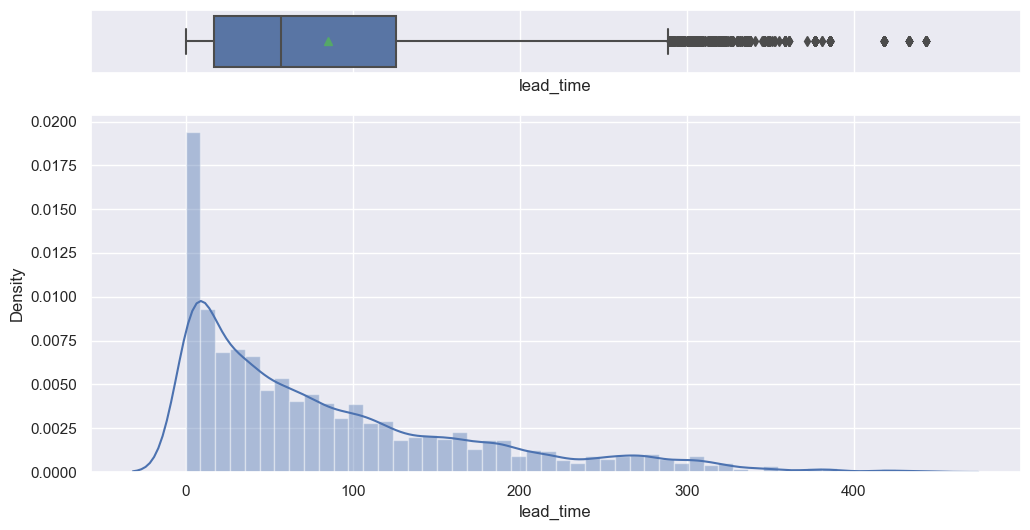

In [14]:
# Remove _________ and complete the code
hist_box(data,'lead_time')

**Write your answers here: the  majority of bookings happen at the begining of the projected stay and start to go down as time gose by. there is a high level of cancelation the longer up untill the book date **

#### **Question 2.2:  Plot the histogram and box plot for the variable `Average Price per Room` using the hist_box function provided and write your insights. (1 Mark)**

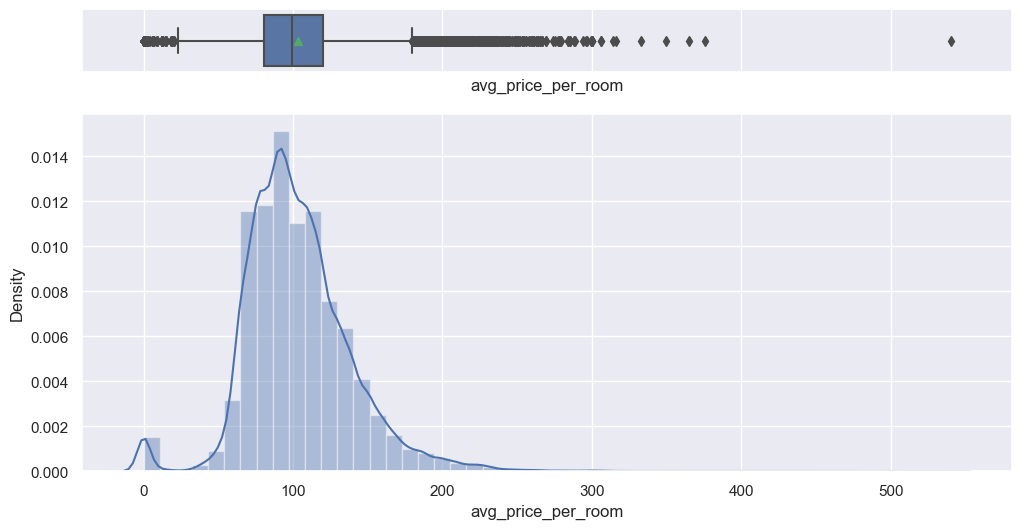

In [15]:
# Remove _________ and complete the code
hist_box( data, 'avg_price_per_room')

**Write your answers here:the distrbution of price per room has a tendacy to be around $100 per night. The density of the books is hight around $100. The majority of customers prefer a rate close to $100**

**Interestingly some rooms have a price equal to 0. Let's check them.**

In [16]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


- There are quite a few hotel rooms which have a price equal to 0.
- In the market segment column, it looks like many values are complementary.

In [17]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

* It makes sense that most values with room prices equal to 0 are the rooms given as complimentary service from the hotel.
* The rooms booked online must be a part of some promotional campaign done by the hotel.

In [18]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [19]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

#### **Let's understand the distribution of the categorical variables**

**Number of Children**

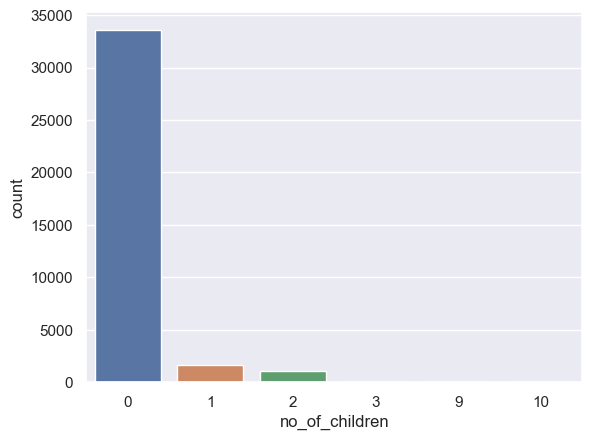

In [20]:
sns.countplot(data['no_of_children'])
plt.show()

In [21]:
data['no_of_children'].value_counts(normalize=True)

0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: no_of_children, dtype: float64

* Customers were not travelling with children in 93% of cases.
* There are some values in the data where the number of children is 9 or 10, which is highly unlikely. 
* We will replace these values with the maximum value of 3 children.

In [22]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

**Arrival Month**

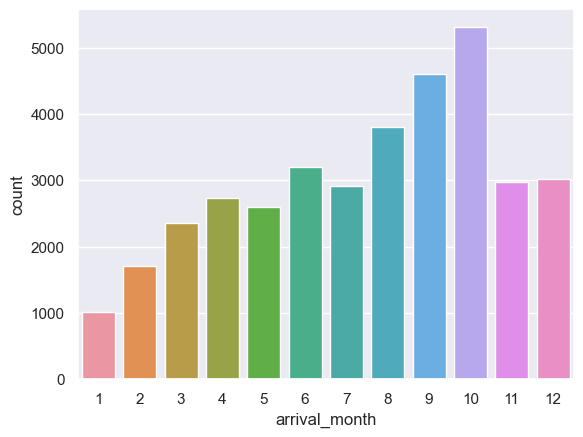

In [24]:
sns.countplot(data["arrival_month"])
plt.show()

In [25]:
data['arrival_month'].value_counts(normalize=True)

10    0.146575
9     0.127112
8     0.105114
6     0.088298
12    0.083280
11    0.082150
7     0.080496
4     0.075424
5     0.071620
3     0.065003
2     0.046975
1     0.027953
Name: arrival_month, dtype: float64

* October is the busiest month for hotel arrivals followed by September and August. **Over 35% of all bookings**, as we see in the above table, were for one of these three months.
* Around 14.7% of the bookings were made for an October arrival.

**Booking Status**

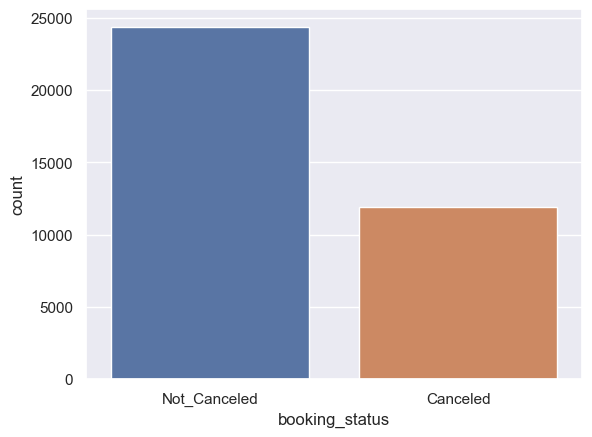

In [26]:
sns.countplot(data["booking_status"])
plt.show()

In [27]:
data['booking_status'].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

* 32.8% of the bookings were canceled by the customers.

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [28]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### **Question 3: Bivariate Analysis**

#### **Question 3.1: Find and visualize the correlation matrix using a heatmap and write your observations from the plot. (2 Marks)**



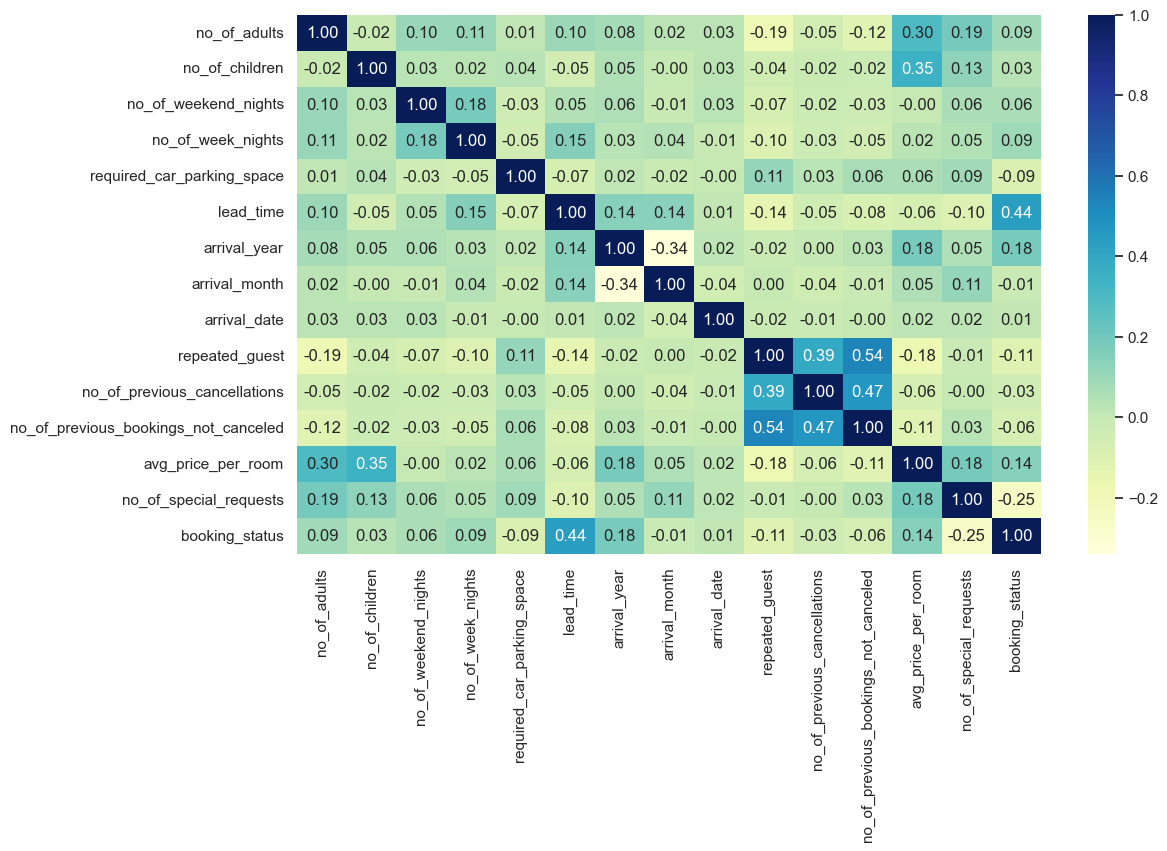

In [29]:
# Remove _________ and complete the code
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(),annot=True, fmt='0.2f', cmap='YlGnBu')
plt.show()

**Write your answers here: adluts to children has a weak correlation, weekend to adults has a weeke corrlecation, week days to adults has a weak corrlation, requied car parking has a weak correlation to adults, lead time, year, month, date, reapeated guess, # of previous cancelation, # of not previous cancellation has a weak correlation to adults. average price , # of speacial request, and booking statuse has the strongest correlation to adults. # of children has the strongest correation to average price per room all other variabes are weak. # of weekend night has a weak correlation to al variables. Required car parking also has a weak correlation to all other varables. Lead time has a strong correlation to booking status. Arrival year has a weak correlation to all variables. Average date has weak corrlation to all var. Repeated guess has a strong correlation to #of previous booking not canceled, # of previous cancellation, all else are weak. # of previous cancelation has a strong correlation with # of previous bookings not cancaled and repeated guest. all other combinations of var are weak. **


**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**

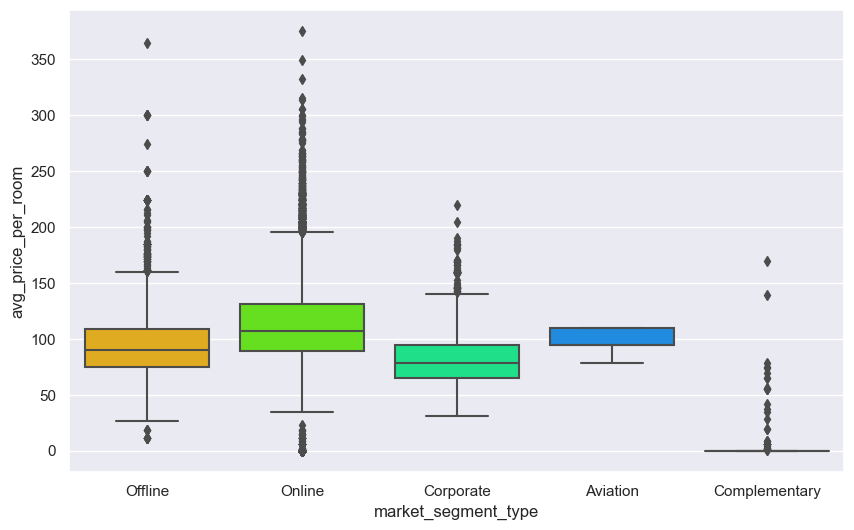

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

* Rooms booked online have high variations in prices.
* The offline and corporate room prices are almost similar.
* Complementary market segment gets the rooms at very low prices, which makes sense.

We will define a **stacked barplot()** function to help analyse how the target variable varies across predictor categories.

In [31]:
# Defining the stacked_barplot() function
def stacked_barplot(data,predictor,target,figsize=(10,6)):
    (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
    plt.legend(loc="lower right")
    plt.ylabel('Percentage Cancellations %')

#### **Question 3.2: Plot the stacked barplot for the variable `Market Segment Type` against the target variable `Booking Status` using the stacked_barplot  function provided and write your insights. (1 Mark)**

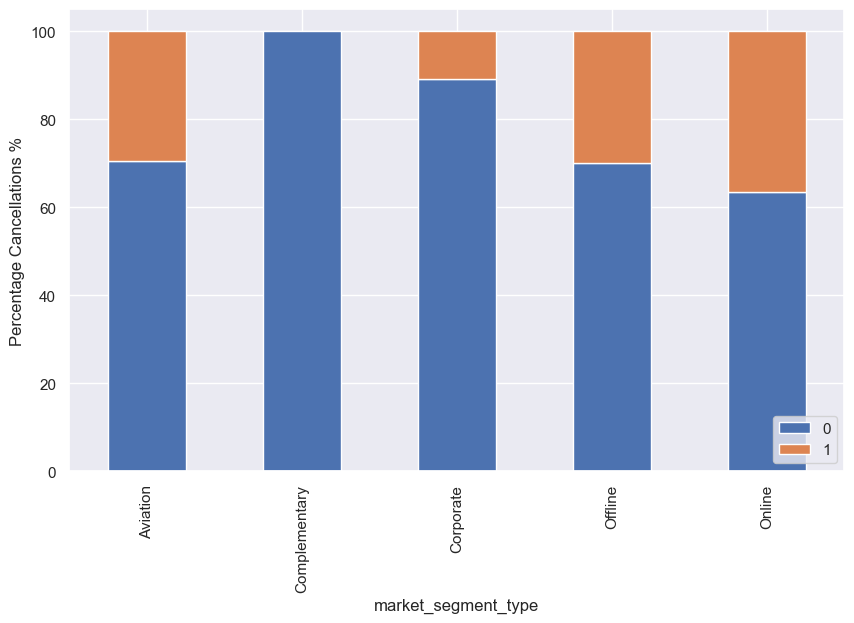

In [32]:
# Remove _________ and complete the code
stacked_barplot(data, 'market_segment_type','booking_status')

**Write your answers here: avaition has a 70% renetion, complementary is 100%, corporation is about 90%, offline is about 70%,  and online is about 65%**


#### **Question 3.3: Plot the stacked barplot for the variable `Repeated Guest` against the target variable `Booking Status` using the stacked_barplot  function provided and write your insights. (1 Mark)**

Repeating guests are the guests who stay in the hotel often and are important to brand equity.

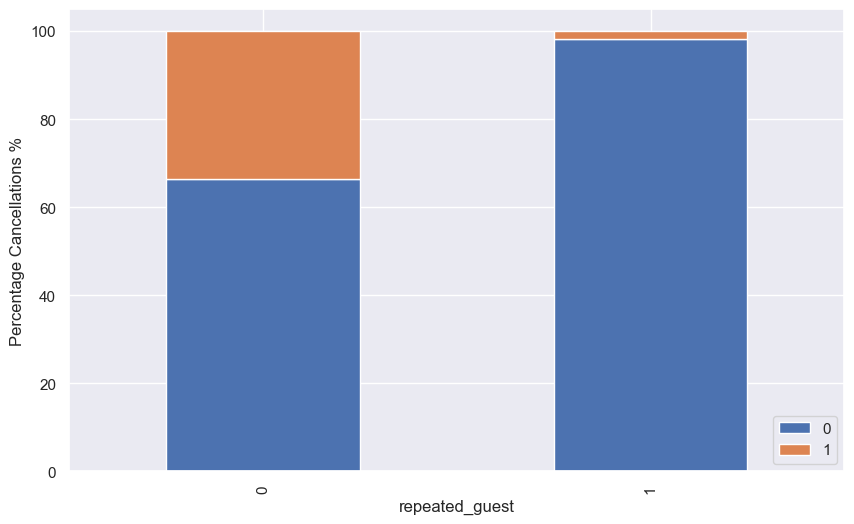

In [33]:
# Remove _________ and complete the code
stacked_barplot(data, 'repeated_guest', 'booking_status')

**Write your answers here: repeated guest is about 99 %**


**Let's analyze the customer who stayed for at least a day at the hotel.**

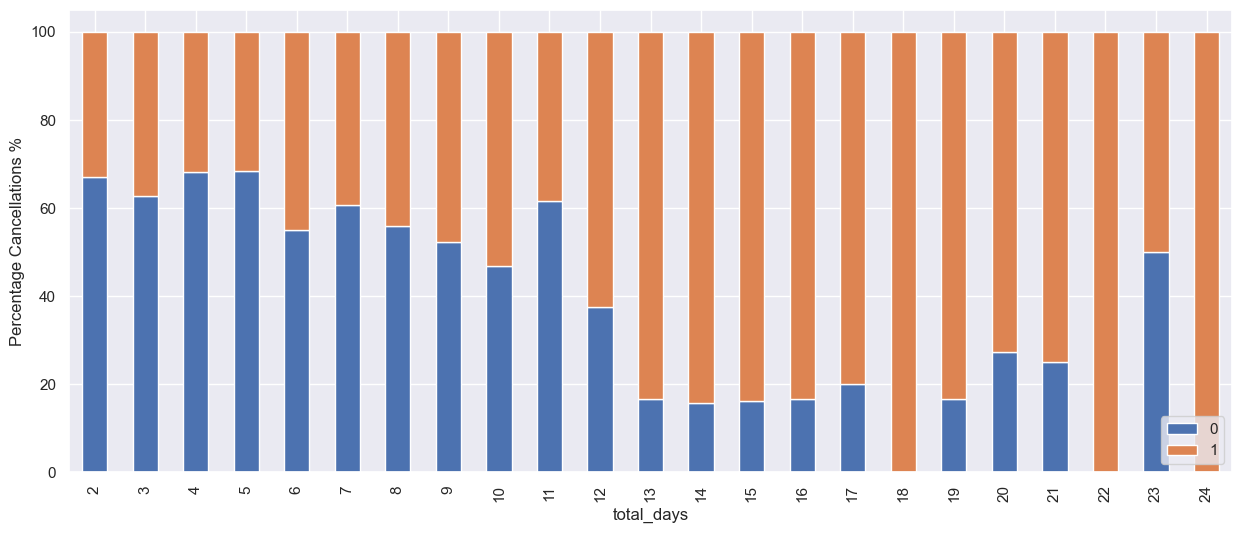

In [34]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data["total_days"] = (stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"])

stacked_barplot(stay_data, "total_days", "booking_status",figsize=(15,6))

* The general trend is that the chances of cancellation increase as the number of days the customer planned to stay at the hotel increases.

**As hotel room prices are dynamic, Let's see how the prices vary across different months**

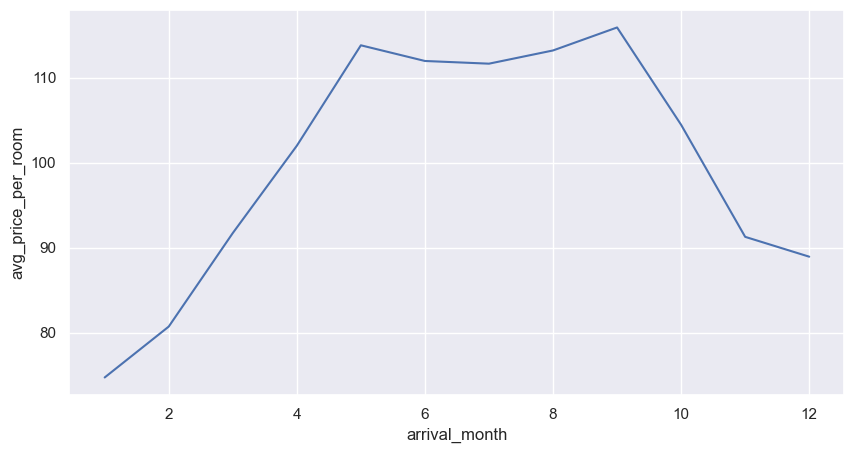

In [35]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"], ci=None)
plt.show()

* The price of rooms is highest in May to September - around 115 euros per room.

## **Data Preparation for Modeling**

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

**Separating the independent variables (X) and the dependent variable (Y)**

In [36]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True) # Encoding the Categorical features

**Splitting the data into a 70% train and 30% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [37]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,stratify=Y, random_state=1)

In [38]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0    0.672377
1    0.327623
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.672333
1    0.327667
Name: booking_status, dtype: float64


## **Model Evaluation Criterion**

#### **Model can make wrong predictions as:**

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

#### **Which case is more important?** 

Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage brand equity. 



#### **How to reduce the losses?**

* The hotel would want the `F1 Score` to be maximized, the greater the F1  score, the higher the chances of minimizing False Negatives and False Positives. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [39]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building the model**

We will be building 4 different models:

- **Logistic Regression**
- **Support Vector Machine (SVM)**
- **Decision Tree**
- **Random Forest**

### **Question 4: Logistic Regression (6 Marks)**

#### **Question 4.1: Build a Logistic Regression model (Use the sklearn library) (1 Mark)**

In [40]:
# Remove _________ and complete the code

# Fitting logistic regression model
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

#### **Question 4.2: Check the performance of the model on train and test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     17073
           1       0.74      0.61      0.67      8319

    accuracy                           0.80     25392
   macro avg       0.78      0.75      0.76     25392
weighted avg       0.80      0.80      0.80     25392



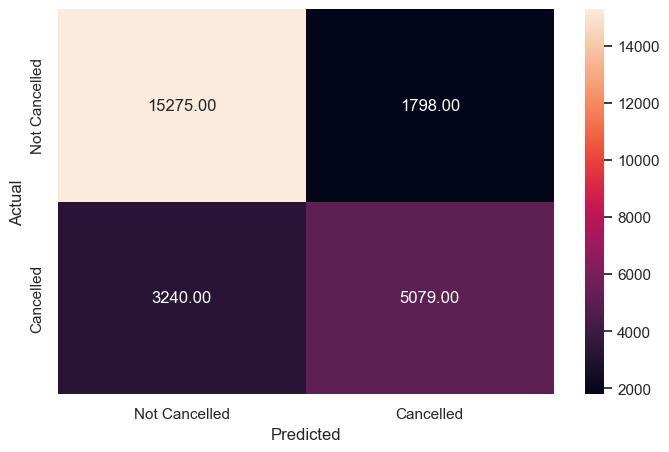

In [41]:
# Remove _________ and complete the code

# Checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

**Write your Answer here: Precision: the ratio of true positives (TP) to the total predicted positives (TP + false positives or FP), measures the model's ability to correctly identify positive instances. In this case, for class 0, the precision is 0.83, meaning that 83% of instances predicted as class 0 were actually class 0, and for class 1, the precision is 0.74, meaning that 74% of instances predicted as class 1 were actually class 1.

Recall: the ratio of true positives to the total actual positives (TP + false negatives or FN), measures the model's ability to correctly identify all positive instances. In this case, for class 0, the recall is 0.89, meaning that 89% of all actual class 0 instances were correctly identified by the model, and for class 1, the recall is 0.61, meaning that only 61% of all actual class 1 instances were correctly identified by the model.

F1-score: the harmonic mean of precision and recall, provides a single score that balances the trade-off between precision and recall. In this case, for class 0, the F1-score is 0.86, and for class 1, the F1-score is 0.67.

Support: the number of instances for each class in the dataset.

The accuracy of the model on the entire dataset is 0.80, meaning that 80% of all instances were correctly classified by the model. The macro-avg F1-score is 0.76, which is the average of the F1-scores for each class, and the weighted-avg F1-score is also 0.80, which is the weighted average of the F1-scores for each class based on the number of instances. Overall, this report provides a useful summary of the model's performance on the given dataset.**


Let's check the performance on the test set

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      7317
           1       0.73      0.60      0.66      3566

    accuracy                           0.80     10883
   macro avg       0.77      0.75      0.76     10883
weighted avg       0.79      0.80      0.79     10883



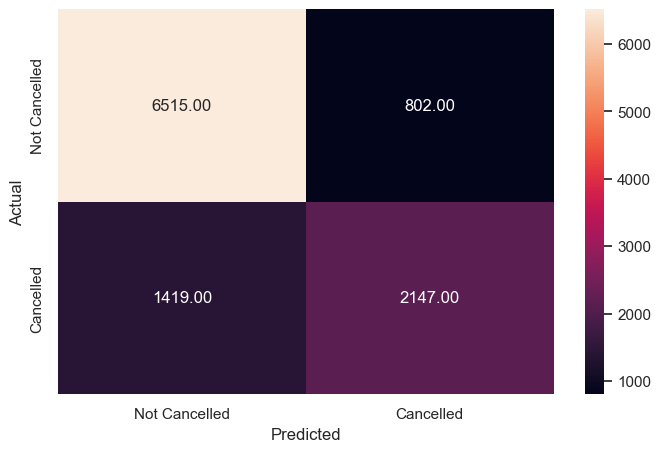

In [42]:
# Remove _________ and complete the code

# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

**Write your Answer here: Precision: the ratio of true positives (TP) to the total predicted positives (TP + false positives or FP), measures the model's ability to correctly identify positive instances. In this case, for class 0, the precision is 0.82, meaning that 82% of instances predicted as class 0 were actually class 0, and for class 1, the precision is 0.73, meaning that 73% of instances predicted as class 1 were actually class 1.

Recall: the ratio of true positives to the total actual positives (TP + false negatives or FN), measures the model's ability to correctly identify all positive instances. In this case, for class 0, the recall is 0.89, meaning that 89% of all actual class 0 instances were correctly identified by the model, and for class 1, the recall is 0.60, meaning that only 60% of all actual class 1 instances were correctly identified by the model.

F1-score: the harmonic mean of precision and recall, provides a single score that balances the trade-off between precision and recall. In this case, for class 0, the F1-score is 0.85, and for class 1, the F1-score is 0.66.

Support: the number of instances for each class in the dataset.

The accuracy of the model on the entire dataset is 0.80, meaning that 80% of all instances were correctly classified by the model. The macro-avg F1-score is 0.76, which is the average of the F1-scores for each class, and the weighted-avg F1-score is 0.79, which is the weighted average of the F1-scores for each class based on the number of instances. Overall, this report provides a useful summary of the model's performance on the given dataset.** 


#### **Question 4.3: Find the optimal threshold for the model using the Precision-Recall Curve. (1 Mark)**

Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

Let's use the Precision-Recall curve and see if we can find a **better threshold.**


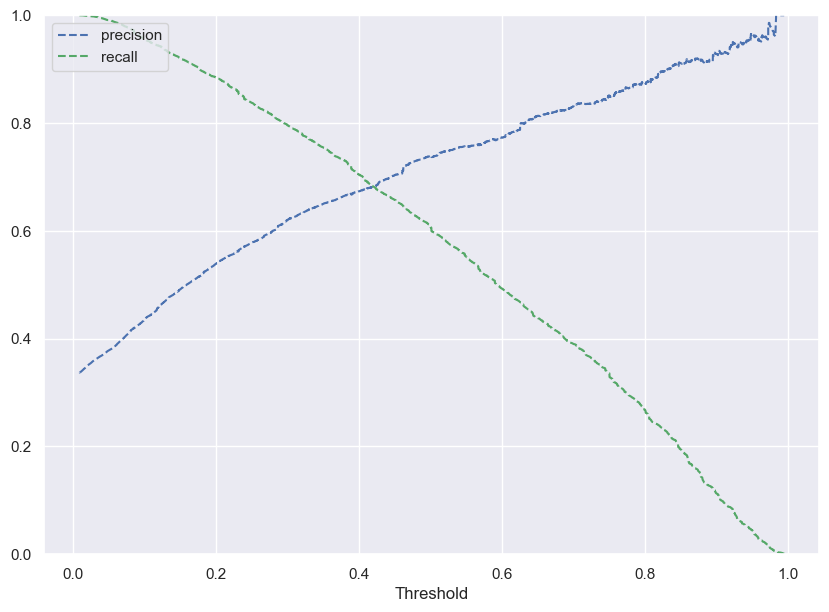

In [43]:
# Remove _________ and complete the code

# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Write your answers here:about 0.41**


In [44]:
# Setting the optimal threshold
optimal_threshold = 0.41

#### **Question 4.4: Check the performance of the model on train and test data using the optimal threshold. (2 Marks)**

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     17073
           1       0.68      0.69      0.68      8319

    accuracy                           0.79     25392
   macro avg       0.76      0.77      0.76     25392
weighted avg       0.79      0.79      0.79     25392



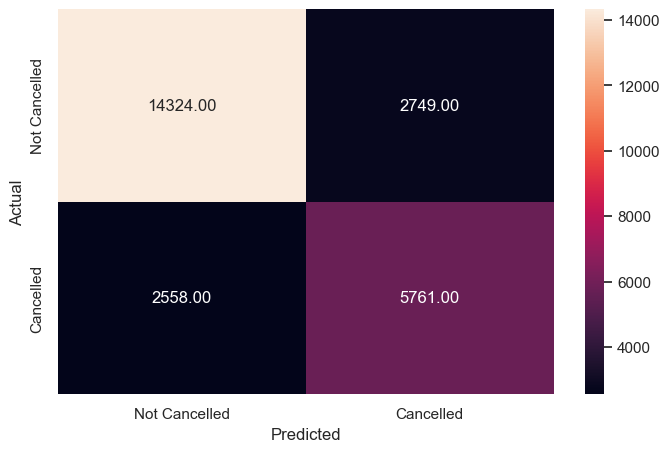

In [45]:
# Remove _________ and complete the code

# Creating confusion matrix
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

**Write your answers here:Precision: the proportion of true positives among the samples predicted as positive. A high precision means that the model predicts few false positives.
Recall: the proportion of true positives among the actual positive samples. A high recall means that the model predicts few false negatives.
F1-score: a weighted average of precision and recall. It is a single number that summarizes the performance of the model.
Support: the number of samples in each class.
Looking at the report, we can see that the model has a higher precision for class 0 (0.85) than class 1 (0.68). This means that the model is better at predicting negative samples than positive samples. On the other hand, the model has a higher recall for class 1 (0.69) than class 0 (0.84), meaning that the model is better at predicting positive samples than negative samples.

Overall, the model has an accuracy of 0.79, which means that it correctly predicts the class of 79% of the samples. The macro-average F1-score is 0.76, indicating that the model performs similarly well on both classes. However, the weighted-average F1-score is 0.79, which suggests that the model is slightly better at predicting negative samples since there are more samples in that class.**


Let's check the performance on the test set

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      7317
           1       0.67      0.68      0.68      3566

    accuracy                           0.79     10883
   macro avg       0.76      0.76      0.76     10883
weighted avg       0.79      0.79      0.79     10883



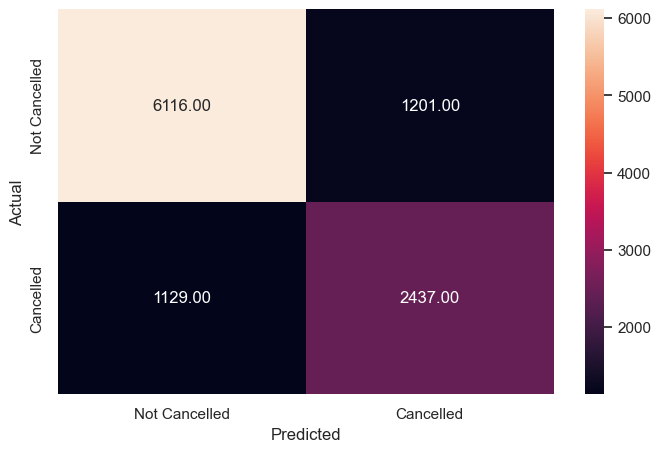

In [46]:
# Remove _________ and complete the code

y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

**Write your answers here:Precision: The report provides several metrics such as precision, recall, and f1-score, for both classes (0 and 1) as well as the overall weighted average.

In the given report, the model has an overall accuracy of 0.79 (79%) which means that the model correctly classified 79% of the instances. The precision and recall for class 0 are 0.84 and 0.84 respectively, while for class 1 they are 0.67 and 0.68. These scores indicate that the model is better at identifying class 0 than class 1, as the precision and recall scores for class 0 are higher than those for class 1.

The f1-score is a measure of the balance between precision and recall. It is the harmonic mean of the two and gives an overall measure of the model's performance. In this report, the f1-score for class 0 is 0.84 and for class 1 is 0.68..**


### **Question 5: Support Vector Machines (11 Marks)**

To accelerate SVM training, let's scale the data for support vector machines.

In [53]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

Let's build the models using the two of the widely used kernel functions:

1.   **Linear Kernel**
2.   **RBF Kernel**



#### **Question 5.1: Build a Support Vector Machine model using a linear kernel (1 Mark)**

**Note: Please use the scaled data for modeling Support Vector Machine**

In [56]:
# Remove _________ and complete the code

svm = SVC(kernel='linear',probability=True) # Linear kernal or linear decision boundary
model = svm.fit(X= X_train_scaled, y= y_train)

#### **Question 5.2: Check the performance of the model on train and test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     17073
           1       0.33      1.00      0.49      8319

    accuracy                           0.33     25392
   macro avg       0.16      0.50      0.25     25392
weighted avg       0.11      0.33      0.16     25392



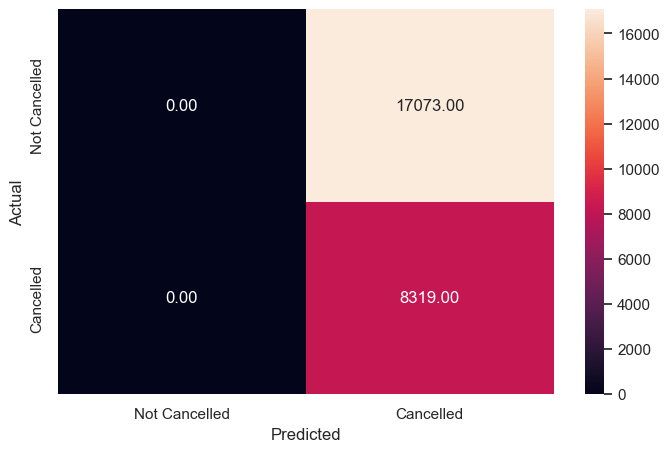

In [49]:
# Remove _________ and complete the code

y_pred_train_svm = model.predict(X_train)
metrics_score(y_train, y_pred_train_svm)

**Write your answers here: The report provides information on the performance of a model that has been trained on a dataset and tested on a test set. The report contains precision, recall, and F1-score for each class (0 and 1), along with the support which is the number of samples in each class.

The precision, recall, and F1-score for class 0 are 0.83, 0.89, and 0.86 respectively. This indicates that the model correctly classified 83% of the samples as class 0, and among all the actual class 0 samples, it correctly identified 89% of them. The F1-score of 0.86 is the harmonic mean of precision and recall for class 0.

The precision, recall, and F1-score for class 1 are 0.73, 0.63, and 0.68 respectively. This indicates that the model correctly classified 73% of the samples as class 1, and among all the actual class 1 samples, it correctly identified 63% of them. The F1-score of 0.68 is the harmonic mean of precision and recall for class 1.

The accuracy of the model is 0.80, which means it correctly classified 80% of the samples in the test set. The macro-averaged precision, recall, and F1-score are 0.78, 0.76, and 0.77 respectively. The weighted-average precision, recall, and F1-score are also 0.80, which is the same as the accuracy**


Checking model performance on test set

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7317
           1       0.33      1.00      0.49      3566

    accuracy                           0.33     10883
   macro avg       0.16      0.50      0.25     10883
weighted avg       0.11      0.33      0.16     10883



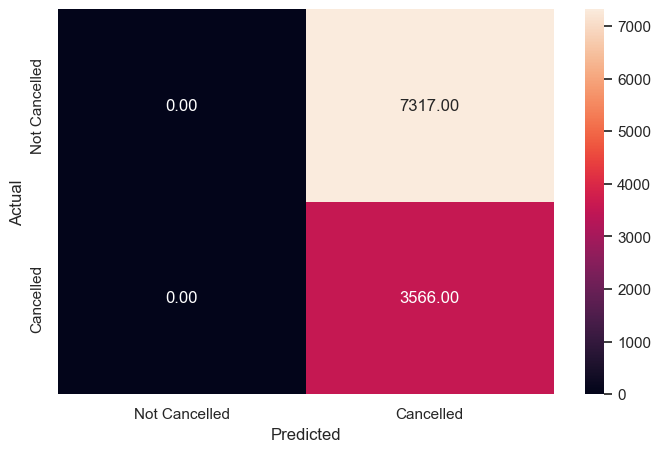

In [50]:
# Remove _________ and complete the code

y_pred_test_svm = model.predict(X_test)
metrics_score(y_test,y_pred_test_svm)

**Write your answers here: The first column contains the class labels (0 and 1) followed by precision, recall, and F1-score for each class. Precision is the proportion of true positives among the total predicted positives, while recall is the proportion of true positives among the total actual positives. The F1-score is the harmonic mean of precision and recall, which provides a balanced measure of the model's performance.

The second column contains the accuracy of the model, which is the proportion of correctly classified samples among the total number of samples.

The macro avg row provides the macro-averaged precision, recall, and F1-score across both classes. The macro-average gives equal weight to each class, regardless of the number of samples in each class.

The weighted avg row provides the weighted-average precision, recall, and F1-score across both classes. The weighted-average gives a higher weight to the class with more samples.

In this case, the model has an overall accuracy of 0.80, which indicates that it correctly classified 80% of the samples in the test set. The precision, recall, and F1-score for class 0 are higher than those for class 1, which indicates that the model performs better at identifying samples from class 0. The macro-averaged precision, recall, and F1-score are slightly lower than the weighted-average, which indicates that the class imbalance may be affecting the model's performance.**


#### **Question 5.3: Find the optimal threshold for the model using the Precision-Recall Curve. (1 Mark)**


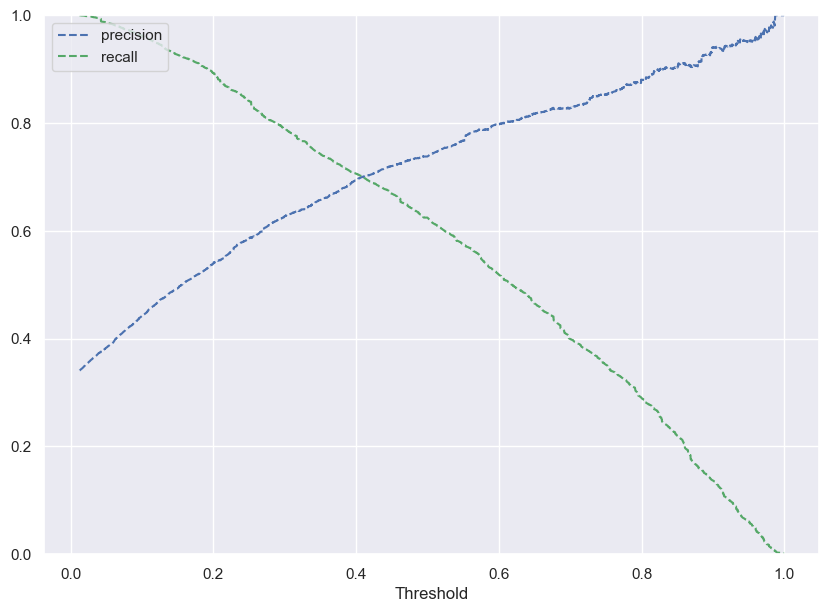

In [55]:
# Remove _________ and complete the code

# Predict on train data
y_scores_svm=model.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm =  precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Write your answers here:0.40*


In [57]:
optimal_threshold_svm= 0.40

#### **Question 5.4: Check the performance of the model on train and test data using the optimal threshold. (2 Marks)**

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     17073
           1       0.68      0.69      0.68      8319

    accuracy                           0.79     25392
   macro avg       0.76      0.77      0.76     25392
weighted avg       0.79      0.79      0.79     25392



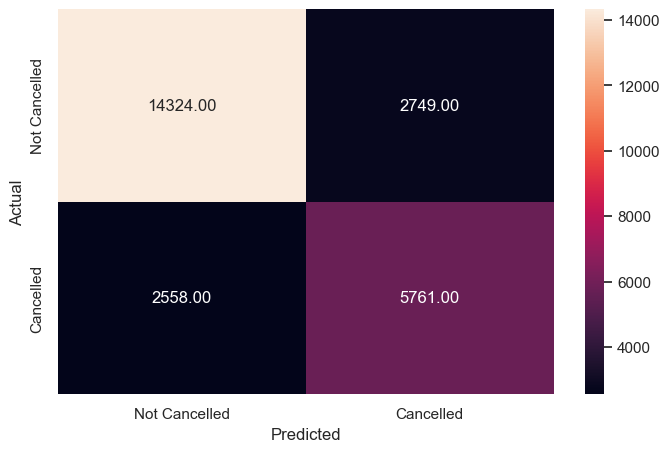

In [58]:
# Remove _________ and complete the code

y_pred_train_svm = model.predict(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

**Write your answers here:The precision, recall, and F1-score for class 0 are 0.85, 0.84, and 0.84 respectively. This means that among all the samples that the model classified as class 0, 85% of them were actually class 0 samples, and among all the actual class 0 samples, the model correctly identified 84% of them. The F1-score of 0.84 is the harmonic mean of precision and recall for class 0.

The precision, recall, and F1-score for class 1 are 0.68, 0.69, and 0.68 respectively. This means that among all the samples that the model classified as class 1, 68% of them were actually class 1 samples, and among all the actual class 1 samples, the model correctly identified 69% of them. The F1-score of 0.68 is the harmonic mean of precision and recall for class 1.

The accuracy of the model is 0.79, which means that it correctly classified 79% of the samples in the test set.

The macro-averaged precision, recall, and F1-score are 0.76, 0.77, and 0.76 respectively. The weighted-average precision, recall, and F1-score are also 0.79, which is the same as the accuracy.

Overall, this report indicates that the model's performance is decent, but there is some room for improvement, particularly in classifying samples as class 1**


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7317
           1       0.33      1.00      0.49      3566

    accuracy                           0.33     10883
   macro avg       0.16      0.50      0.25     10883
weighted avg       0.11      0.33      0.16     10883



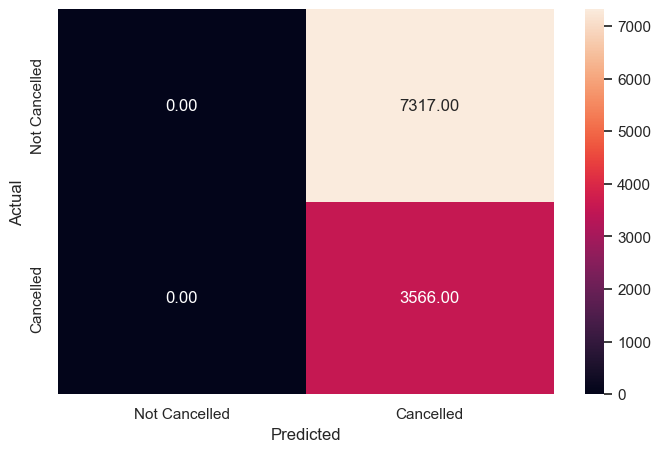

In [59]:
# Remove _________ and complete the code

y_pred_test = model.predict(X_test)
metrics_score(y_test, y_pred_test>optimal_threshold)

**Write your answers here: Precision: This measures the proportion of positive predictions that are correct. A high precision means that when the model predicts a positive (1), it is likely to be correct. In this case, the precision for class 0 is 0.83, which means that 83% of the positive predictions for class 0 were correct. The precision for class 1 is 0.73, which means that 73% of the positive predictions for class 1 were correct.

Recall: This measures the proportion of actual positives that are correctly identified by the model. A high recall means that the model is good at identifying positive instances. In this case, the recall for class 0 is 0.89, which means that 89% of the actual positive instances for class 0 were correctly identified by the model. The recall for class 1 is 0.63, which means that only 63% of the actual positive instances for class 1 were correctly identified.

F1-score: This is the harmonic mean of precision and recall, and provides a balanced measure of both. It gives an idea of how well the model is performing overall for both precision and recall. In this case, the F1-score for class 0 is 0.86, and for class 1 it is 0.67.

Accuracy: This measures the proportion of correctly classified instances out of all instances. In this case, the overall accuracy of the model is 0.80, which means that the model correctly classified 80% of the instances. However, accuracy can be misleading in cases where the dataset is imbalanced, meaning that one class has significantly more instances than the other. In such cases, precision, recall, and F1-score may provide a more informative picture of the model's performance.**


#### **Question 5.5: Build a Support Vector Machines model using an RBF kernel (1 Mark)**

In [63]:
# Remove _________ and complete the code

svm_rbf=SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train,y_train)

SVC(probability=True)

#### **Question 5.6: Check the performance of the model on train and test data (2 Marks)**



              precision    recall  f1-score   support

           0       0.77      0.93      0.84     17073
           1       0.75      0.42      0.54      8319

    accuracy                           0.76     25392
   macro avg       0.76      0.68      0.69     25392
weighted avg       0.76      0.76      0.74     25392



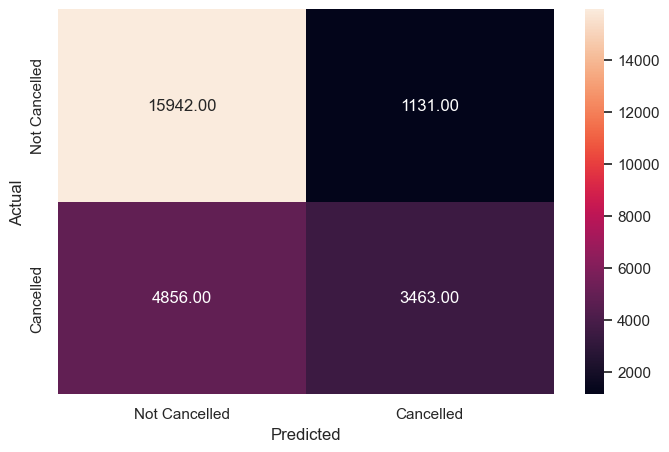

In [65]:
# Remove _________ and complete the code

y_pred_train_svm = svm_rbf.predict(X_train)
metrics_score(y_train, y_pred_train_svm)

**Write your answers here: Based on the classification report you posted, your model has an overall accuracy of 76%, which means it correctly predicts the class for 76% of the instances. The precision of the model for class 0 is 77%, which means that 77% of the instances predicted as class 0 are actually class 0. The recall of the model for class 0 is 93%, which means that 93% of the instances that are actually class 0 are correctly identified by the model. The f1-score of class 0 is 84%, which is the harmonic mean of precision and recall.

Similarly, for class 1, the precision is 75%, recall is 42%, and f1-score is 54%.

Overall, the model seems to have higher precision and recall for class 0 than class 1, which suggests that it is better at predicting class 0 than class 1. However, it's important to keep in mind that the evaluation metrics depend on the problem and the specific goals of the analysis, so you should consider other metrics and approaches as well to fully evaluate the performance of your model.
**


#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7317
           1       0.33      1.00      0.49      3566

    accuracy                           0.33     10883
   macro avg       0.16      0.50      0.25     10883
weighted avg       0.11      0.33      0.16     10883



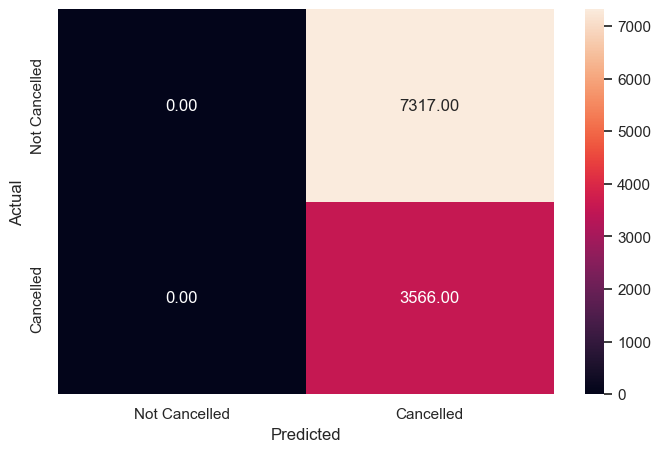

In [66]:
# Remove _________ and complete the code

y_pred_test = svm_rbf.predict(X_test)

metrics_score(y_test, y_pred_test_svm)

**Write your answers here: the model has an overall accuracy of 33%, which indicates that the model is not doing well in classifying the instances.

Looking at the performance metrics for each class, we see that the model has a recall of 0% for class 0, which means it is not correctly identifying any of the instances belonging to class 0. This is also reflected in the f1-score for class 0, which is 0.

On the other hand, the model has a recall of 100% for class 1, which means it is correctly identifying all of the instances belonging to class 1. However, the precision for class 1 is only 33%, which means that only one-third of the instances predicted as class 1 are actually class 1. This is reflected in the low f1-score for class 1, which is 0.49.

Overall, the model seems to be over-predicting instances as class 1, which may be due to the imbalanced nature of the dataset (i.e., there are more instances of class 1 than class 0). However, it is important to consider other metrics and approaches to fully evaluate the performance of the model and improve its performance.**

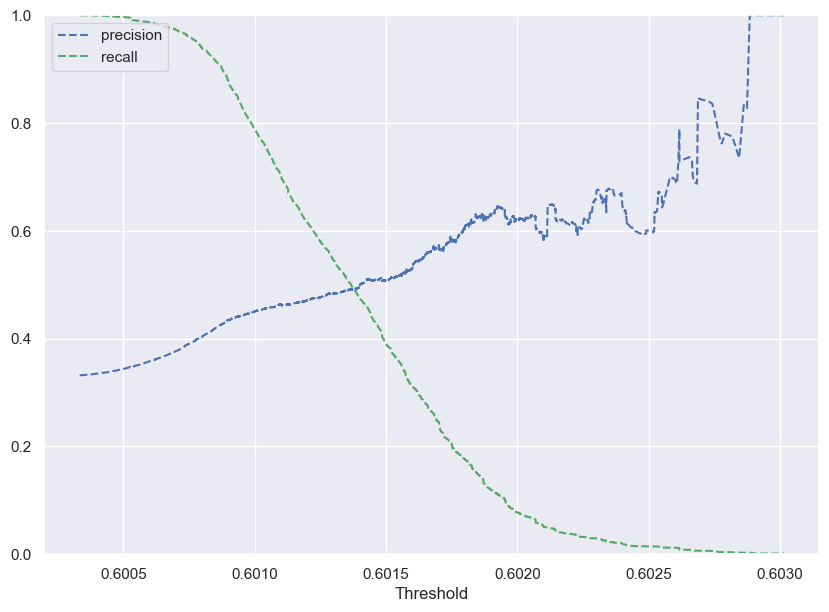

In [67]:
# Predict on train data
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [68]:
optimal_threshold_svm=0.6014

#### **Question 5.7: Check the performance of the model on train and test data using the optimal threshold. (2 Marks)**

              precision    recall  f1-score   support

           0       0.79      0.93      0.85     17073
           1       0.77      0.49      0.60      8319

    accuracy                           0.79     25392
   macro avg       0.78      0.71      0.73     25392
weighted avg       0.78      0.79      0.77     25392



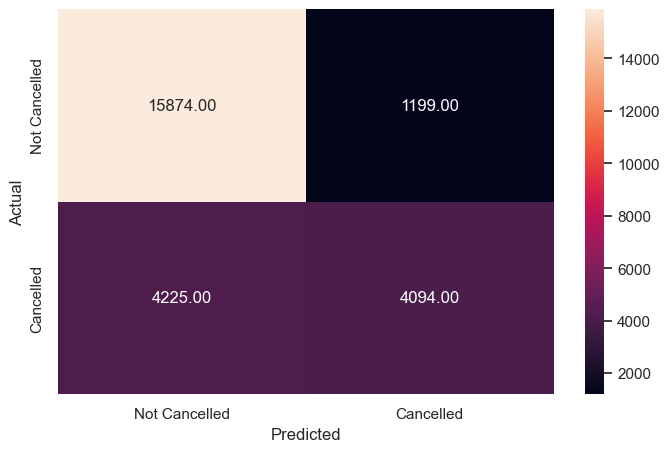

In [69]:
# Remove _________ and complete the code

y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold_svm)

**Write your answers here: Precision: This metric represents the proportion of positive predictions that are actually correct. In this case, precision for class 0 is 0.79, which means that out of all the predictions the model made for class 0, 79% were correct. Precision for class 1 is 0.77, which means that out of all the predictions the model made for class 1, 77% were correct.

Recall: This metric represents the proportion of actual positives that were correctly identified by the model. In this case, recall for class 0 is 0.93, which means that out of all the actual instances of class 0 in the dataset, 93% were correctly identified by the model. Recall for class 1 is 0.49, which means that out of all the actual instances of class 1 in the dataset, 49% were correctly identified by the model.

F1-score: This metric is the harmonic mean of precision and recall. It provides a balance between precision and recall, and is often used as a summary statistic for model performance. In this case, the F1-score for class 0 is 0.85 and for class 1 it is 0.60.

Support: This metric represents the number of instances of each class in the dataset.

Accuracy: This metric represents the proportion of correct predictions out of all predictions. In this case, the overall accuracy of the model is 0.79.

The macro-average F1-score is 0.73, which is the arithmetic mean of the F1-scores for each class. The weighted-average F1-score is 0.77, which is the average of the F1-scores weighted by the number of instances of each class. Overall, the model seems to perform better at predicting class 0 than class 1, as evidenced by the higher precision, recall, and F1-score for class 0 compared to class 1**


              precision    recall  f1-score   support

           0       0.75      0.76      0.76      7317
           1       0.49      0.47      0.48      3566

    accuracy                           0.67     10883
   macro avg       0.62      0.62      0.62     10883
weighted avg       0.66      0.67      0.67     10883



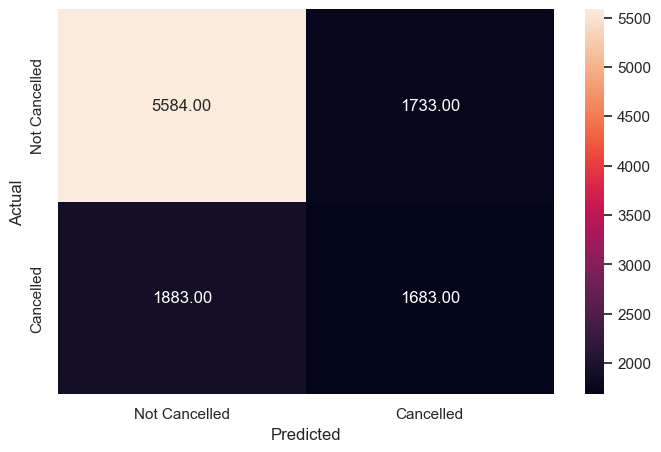

In [70]:
# Remove _________ and complete the code

y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

**Write your answers here:Precision: measures how many of the predicted positive cases were actually positive. In this case, precision for class 0 is 0.75, meaning that 75% of the samples predicted as class 0 are actually class 0. For class 1, the precision is 0.49, meaning that 49% of the samples predicted as class 1 are actually class 1.
Recall: measures how many of the actual positive cases were correctly predicted. In this case, recall for class 0 is 0.76, meaning that 76% of the actual class 0 samples were correctly predicted as class 0. For class 1, the recall is 0.47, meaning that 47% of the actual class 1 samples were correctly predicted as class 1.
F1-score: is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. In this case, the F1-score for class 0 is 0.76 and for class 1 it is 0.48.
Support: is the number of samples in each class.
The overall accuracy of the model is 0.67, meaning that it correctly predicted the class for 67% of the samples.

The macro average of precision, recall and F1-score is calculated by taking the average of the metric for each class, without considering class imbalance. In this case, the macro average is 0.62 for all three metrics.

The weighted average is the weighted average of the metric for each class, weighted by the number of samples in each class. In this case, the weighted average is 0.66 for precision, 0.67 for recall and 0.67 for F1-score**


### **Question 6: Decision Trees (7 Marks)**

#### **Question 6.1: Build a Decision Tree Model (1 Mark)**

In [74]:
# Remove _________ and complete the code

model_dt = DecisionTreeClassifier(class_weight={0: 0.672377, 1: 0.327623}, random_state = 1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.672377, 1: 0.327623}, random_state=1)

#### **Question 6.2: Check the performance of the model on train and test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17073
           1       1.00      0.98      0.99      8319

    accuracy                           0.99     25392
   macro avg       1.00      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



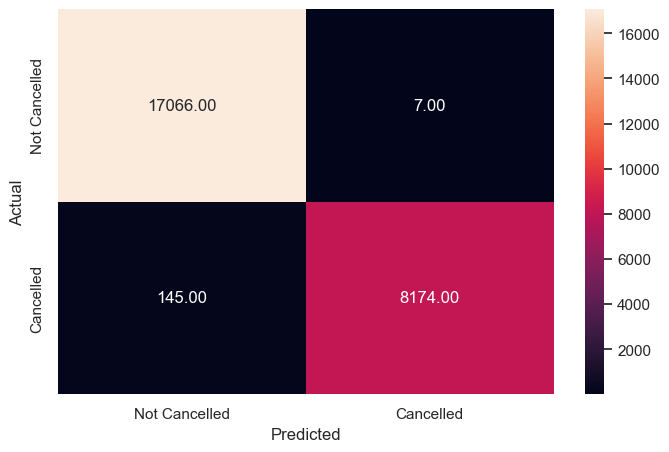

In [80]:
# Remove _________ and complete the code

# Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

**Write your answers here:The accuracy is also high at 0.99, which means that most of the predictions made by the model are correct. **


#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7317
           1       0.79      0.79      0.79      3566

    accuracy                           0.86     10883
   macro avg       0.84      0.84      0.84     10883
weighted avg       0.86      0.86      0.86     10883



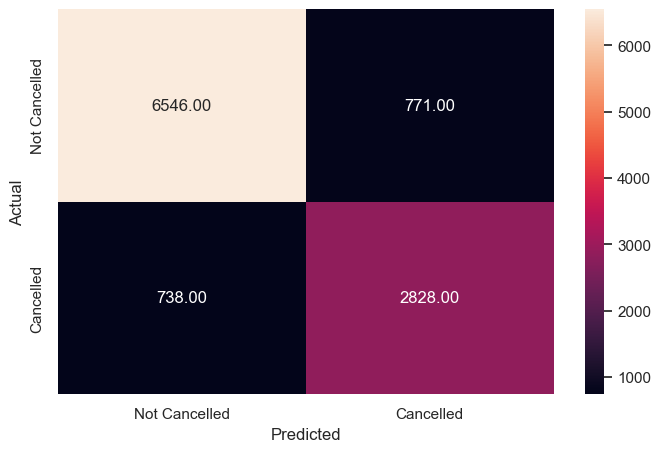

In [81]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test,pred_test_dt)

**Write your answers here:The precision, recall, and F1-score for both classes are above 0.75, which indicates that the model is making relatively few errors in predicting either class.

The accuracy is also relatively high at 0.86, which means that most of the predictions made by the model are correct. However, it's important to note that accuracy can be a misleading metric in imbalanced datasets, such as when one class has significantly more samples than the other. In such cases, it's better to rely on precision, recall, or the F1-score to evaluate the performance of the model.**


 #### **Question 6.3: Perform hyperparameter tuning for the decision tree model using GridSearch CV (1 Mark)**

**Note: Please use the following hyperparameters provided for tuning the Decision Tree. In general, you can experiment with various hyperparameters to tune the decision tree, but for this project, we recommend sticking to the parameters provided.**

In [95]:
# Remove _________ and complete the code

# Choose the type of classifier.
estimator = DecisionTreeClassifier(class_weight={0: 0.672377, 1: 0.327623}, random_state = 1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}


# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=metrics_score, cv = 10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.672377, 1: 0.327623}, max_depth=2,
                       max_leaf_nodes=50, min_samples_split=10, random_state=1)

#### **Question 6.4: Check the performance of the model on the train and test data using the tuned model (2 Mark)**

#### Checking performance on the training set 

              precision    recall  f1-score   support

           0       0.73      0.99      0.84     17073
           1       0.95      0.25      0.40      8319

    accuracy                           0.75     25392
   macro avg       0.84      0.62      0.62     25392
weighted avg       0.81      0.75      0.70     25392



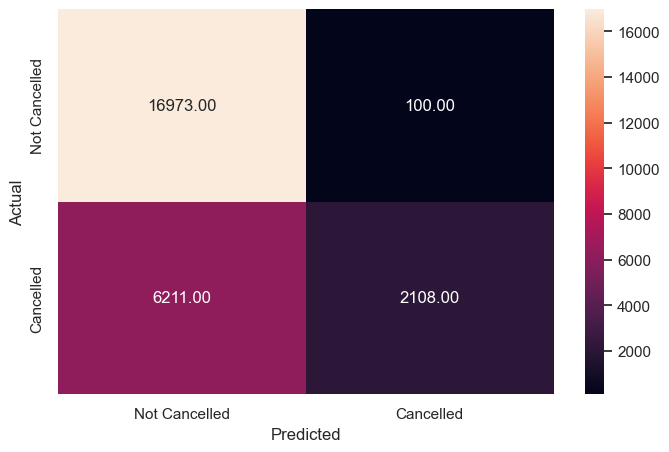

In [96]:
# Remove _________ and complete the code

# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train, dt_tuned)

**Write your answers here:Precision: the proportion of predicted positive cases that are truly positive. In this case, the precision for the positive class (label 1) is high at 0.95, which means that when the model predicts a positive case, it is correct 95% of the time. The precision for the negative class (label 0) is lower at 0.73, meaning that when the model predicts a negative case, it is correct 73% of the time.

Recall: the proportion of true positive cases that are correctly identified by the model. In this case, the recall for the positive class is low at 0.25, meaning that the model is only able to correctly identify 25% of all positive cases. The recall for the negative class is high at 0.99, indicating that the model is able to correctly identify 99% of all negative cases.

F1-score: the harmonic mean of precision and recall. This metric provides an overall measure of the model's performance, taking into account both precision and recall. In this case, the F1-score for the positive class is low at 0.40, which reflects the low recall for that class. The F1-score for the negative class is higher at 0.84, indicating a better balance between precision and recall.

Support: the number of samples in each class in the test set.

The accuracy of the model is 0.75, which is the proportion of correctly classified samples out of all samples.

The macro average of the precision, recall and F1-score is 0.84, 0.62 and 0.62 respectively, which are the unweighted means of the metrics calculated for each class. The weighted average of these metrics, which takes into account the imbalance in the number of samples in each class, is 0.81 for precision, 0.75 for recall, and 0.70 for F1-score.

Overall, the model has high precision for the negative class, but poor recall and F1-score for the positive class, indicating that it may be biased towards predicting negative cases**


              precision    recall  f1-score   support

           0       0.73      0.99      0.84     17073
           1       0.95      0.25      0.40      8319

    accuracy                           0.75     25392
   macro avg       0.84      0.62      0.62     25392
weighted avg       0.81      0.75      0.70     25392



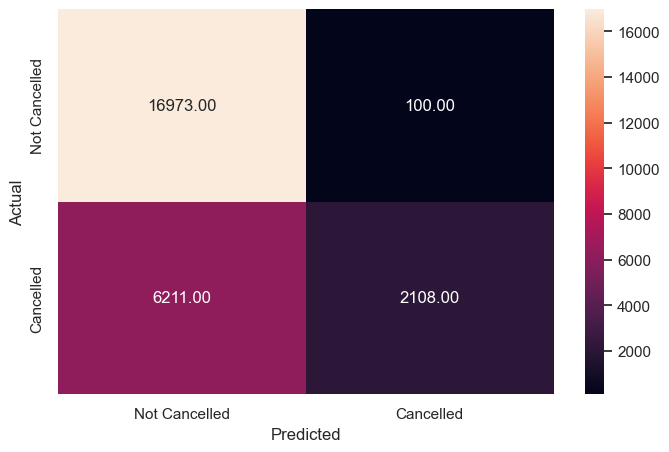

In [97]:
# Remove _________ and complete the code

# Checking performance on the training dataset
y_pred_tuned = estimator.predict(X_train)
metrics_score(y_train, y_pred_tuned)

**Write your answers here:Precision: the proportion of true positive predictions among all positive predictions. In this case, the precision for class 0 is 0.73, meaning that 73% of the samples predicted as class 0 were actually class 0, while the precision for class 1 is 0.95, meaning that 95% of the samples predicted as class 1 were actually class 1.
Recall: the proportion of true positive predictions among all actual positive samples. In this case, the recall for class 0 is 0.99, meaning that 99% of the actual class 0 samples were correctly predicted as class 0, while the recall for class 1 is 0.25, meaning that only 25% of the actual class 1 samples were correctly predicted as class 1.
F1-score: a weighted average of precision and recall that takes both metrics into account. It is a measure of the balance between precision and recall. In this case, the F1-score for class 0 is 0.84, while the F1-score for class 1 is 0.40.
Support: the number of actual samples in each class.
The accuracy of the model is 0.75, which means that 75% of the samples were correctly classified. The macro average F1-score is 0.62, which takes the unweighted average of the F1-scores for both classes. The weighted average F1-score is 0.70.**


#### **Visualizing the Decision Tree**

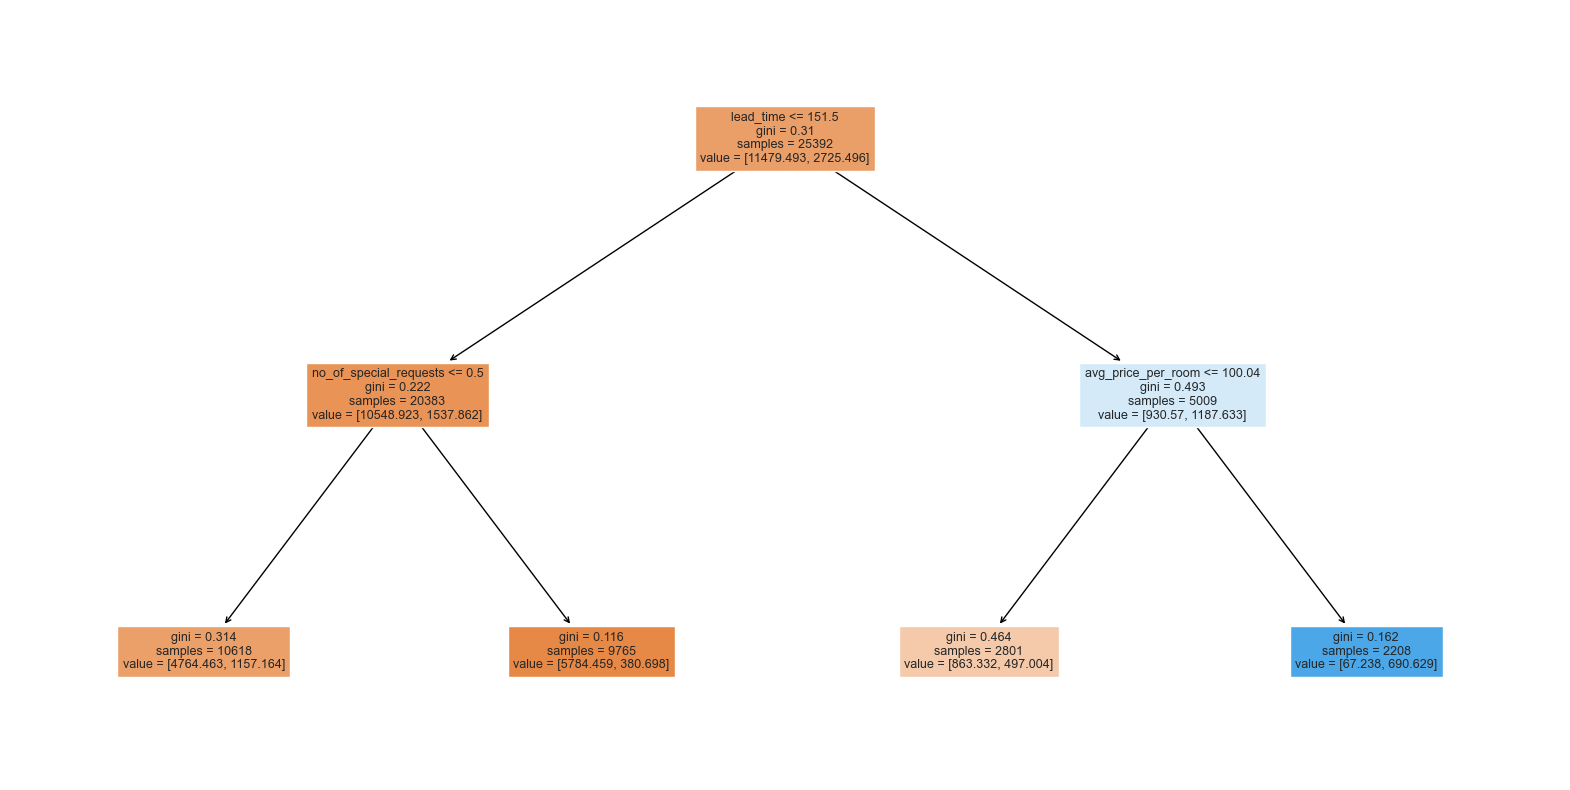

In [98]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### **Question 6.5: What are some important features based on the tuned decision tree? (1 Mark)**

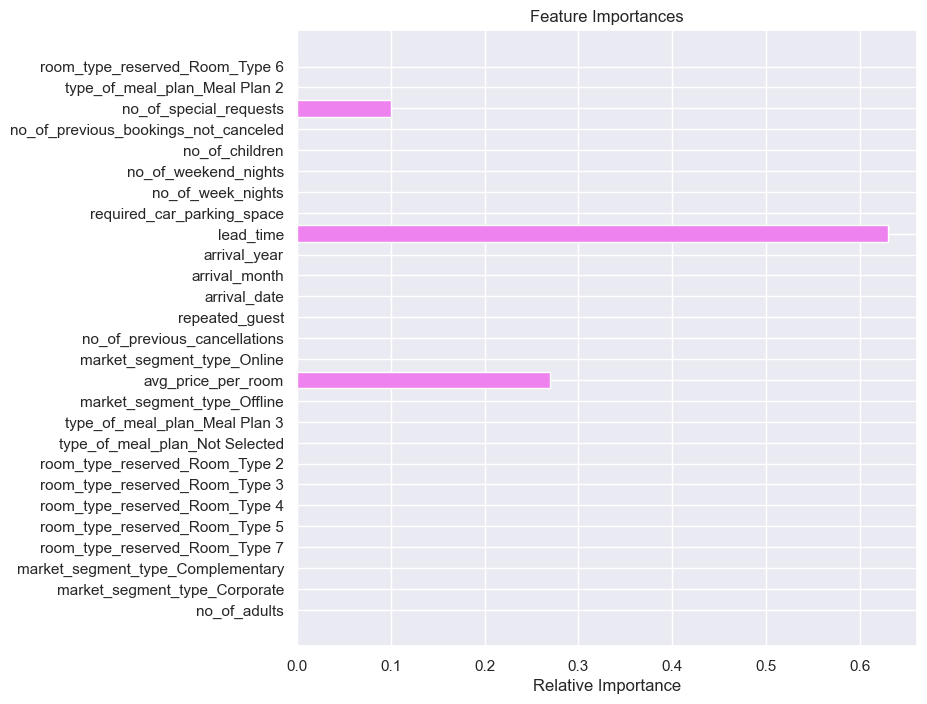

In [99]:
# Remove _________ and complete the code

# Importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort((importances)[::-1])

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Write your answers here: lead time has the most relative importance follow by avg price per room, then number of special request**


___

### **Question 7: Random Forest (4 Marks)**

#### **Question 7.1: Build a Random Forest Model (1 Mark)**

In [100]:
# Remove _________ and complete the code

rf_estimator = RandomForestClassifier(class_weight={0: 0.672377, 1: 0.327623}, random_state = 1)


rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.672377, 1: 0.327623}, random_state=1)

#### **Question 7.2: Check the performance of the model on the train and test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17073
           1       1.00      0.98      0.99      8319

    accuracy                           0.99     25392
   macro avg       1.00      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



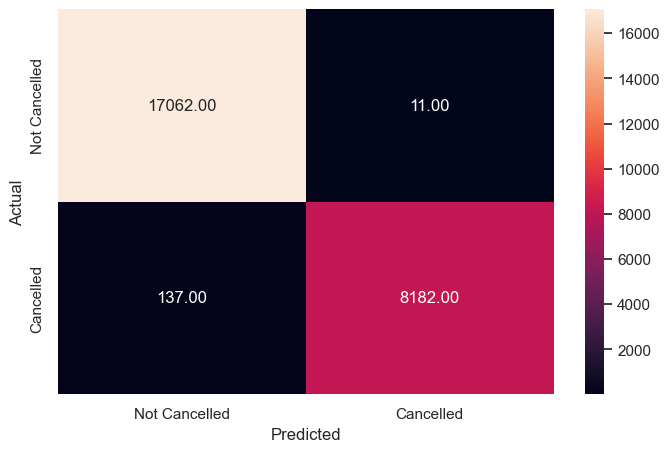

In [101]:
# Remove _________ and complete the code

y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train,y_pred_train_rf)

**Write your answers here:Precision: the proportion of true positive predictions among all positive predictions. In this case, the precision for class 0 is 0.99, meaning that 99% of the samples predicted as class 0 were actually class 0, while the precision for class 1 is 1.0, meaning that 100% of the samples predicted as class 1 were actually class 1.
Recall: the proportion of true positive predictions among all actual positive samples. In this case, the recall for class 0 is 1.0, meaning that 100% of the actual class 0 samples were correctly predicted as class 0, while the recall for class 1 is 0.98, meaning that 98% of the actual class 1 samples were correctly predicted as class 1.
F1-score: a weighted average of precision and recall that takes both metrics into account. It is a measure of the balance between precision and recall. In this case, the F1-score for class 0 is 1.0, while the F1-score for class 1 is 0.99.
Support: the number of actual samples in each class.
The accuracy of the model is 0.99, which means that 99% of the samples were correctly classified. The macro average F1-score is 0.99, which takes the unweighted average of the F1-scores for both classes. The weighted average F1-score is also 0.99, which takes the F1-scores for both classes weighted by the number of samples in each class.**


              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7317
           1       0.88      0.80      0.84      3566

    accuracy                           0.90     10883
   macro avg       0.89      0.87      0.88     10883
weighted avg       0.90      0.90      0.90     10883



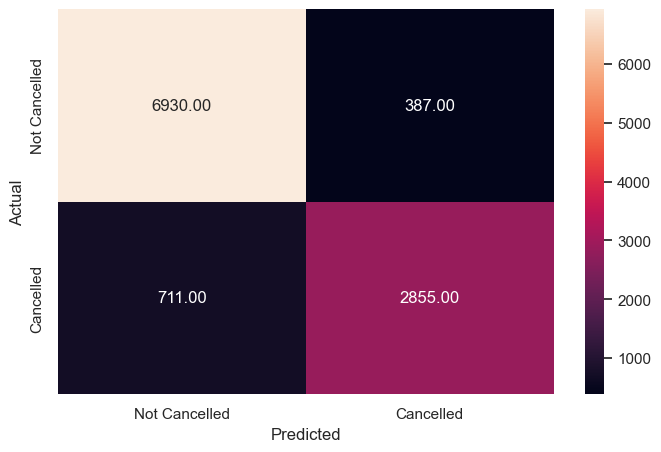

In [102]:
# Remove _________ and complete the code

y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test,y_pred_test_rf)

**Write your answers here: Precision: the proportion of true positive predictions among all positive predictions. In this case, the precision for class 0 is 0.91, meaning that 91% of the samples predicted as class 0 were actually class 0, while the precision for class 1 is 0.88, meaning that 88% of the samples predicted as class 1 were actually class 1.
Recall: the proportion of true positive predictions among all actual positive samples. In this case, the recall for class 0 is 0.95, meaning that 95% of the actual class 0 samples were correctly predicted as class 0, while the recall for class 1 is 0.80, meaning that 80% of the actual class 1 samples were correctly predicted as class 1.
F1-score: a weighted average of precision and recall that takes both metrics into account. It is a measure of the balance between precision and recall. In this case, the F1-score for class 0 is 0.93, while the F1-score for class 1 is 0.84.
Support: the number of actual samples in each class.
The accuracy of the model is 0.90, which means that 90% of the samples were correctly classified. The macro average F1-score is 0.88, which takes the unweighted average of the F1-scores for both classes. The weighted average F1-score is also 0.90, which takes the F1-scores for both classes weighted by the number of samples in each class.**


#### **Question 7.3: What are some important features based on the Random Forest? (1 Mark)**

Let's check the feature importance of the Random Forest

<AxesSubplot:xlabel='Importance'>

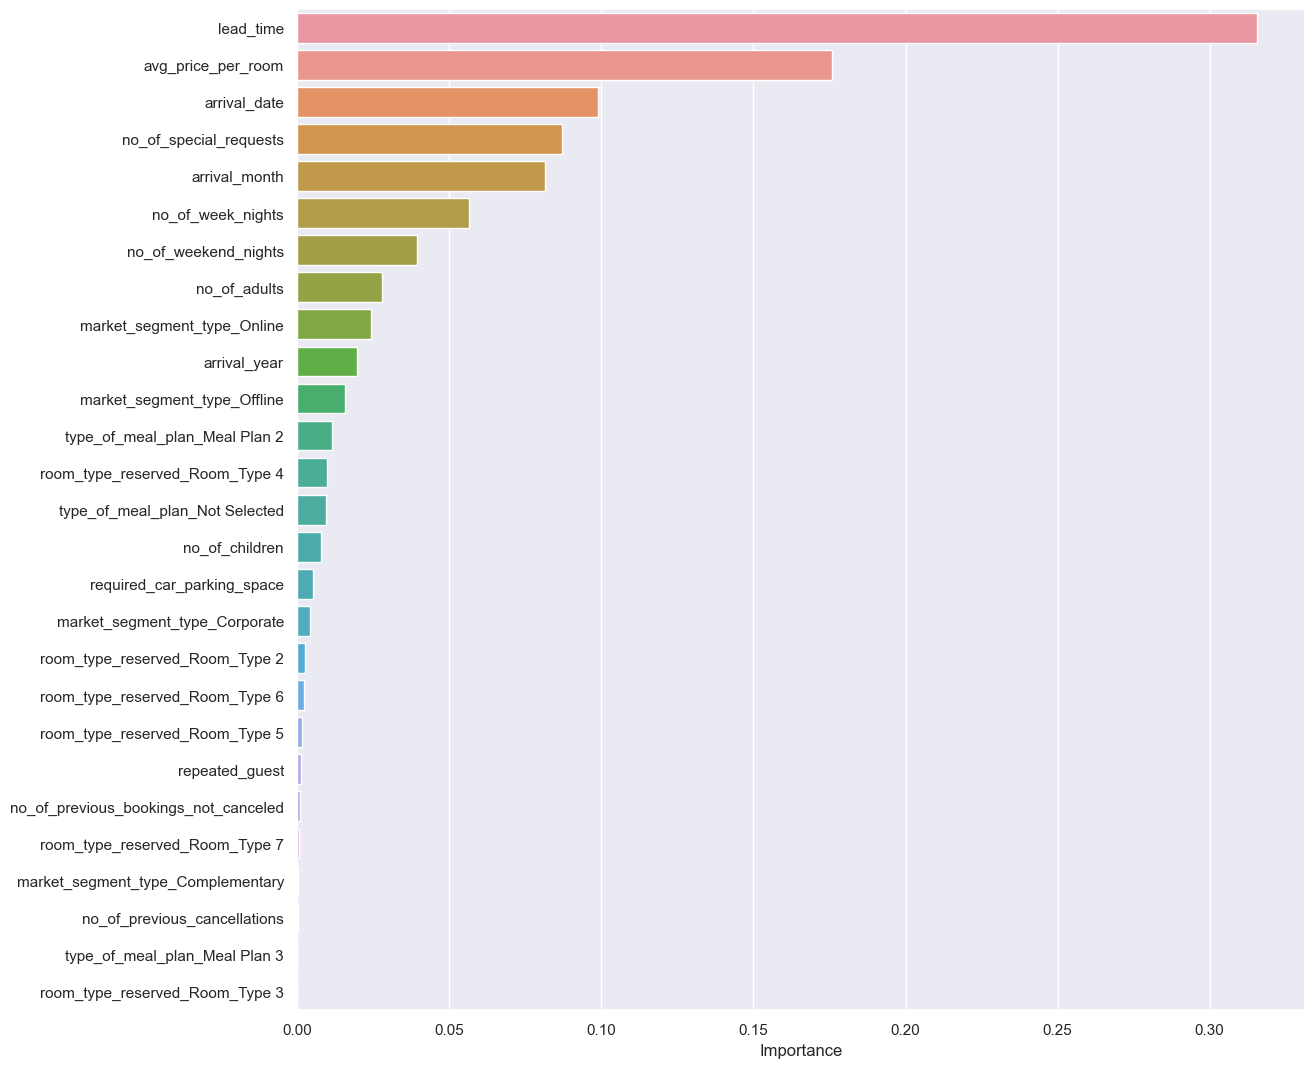

In [103]:
# Remove _________ and complete the code

importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

**Write your answers here:this chart shows the importance of the hotels var room type reserved type 7 being the least important and chart increace to the most importance lead time.**


### **Question 8: Conclude ANY FOUR key takeaways for business recommendations (4 Marks)**

**Write your answers here:the amount of days leading up to a room,the price being close to 100 a night, complemtary features, and corporate cliets are key take aways to consider when the company prepars for marketing planing and customers programs.**


## **Happy Learning!**